# Musterlösung: Aufgabe 1, Übungsblatt 7

## Einführung in die Programmierung für Studierende der Physik
## (Introduction to Programming for Physicists)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2022)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 28.05.2022


## Kurvendiskussion mittels eines Jupyter Notebooks in Verbindung mit einem C++

<H3>Aufgabe 1 </H3>
<p>
Im Folgenden soll ein Teil einer Kurvendiskussion mittels eines eigenen Jupyter Notebooks in Verbindung mit einem C++ angefertigt werden. Gegeben sei die Funktion $f(x)$ 
$$
\begin{equation}
f(x) = e^{-x^2/4} \cdot \hbox{sin}(x/10) \cdot \left( x^4 -q\,x^2 - 5 \right) \quad .
\end{equation}
$$
</p>


<b>Nullstellensuche mit Jupyter und Sympy</b>
<p>
Betrachten Sie sich die Funktion in ihrem gesamten Definitionsbereich ($x \in$ &#8477;) und berechnen Sie für beliebige Parameter $q \in$ &#8477; die Nullstellen der Funktion $f(x)=0$. Wie lauten die Nullstellenwerte für $q=9$ ? 
</p>

<b>Darstellung von $f(x)$, $f^\prime(x)$ und $f^{\prime\prime}(x)$ mittels Jupyter</b>
<p>
Stellen Sie nun die Funktion $f(x)$ und die erste und zweite Ableitung der Funktion im Teilintervall $x \in [-7,7]$ grafisch in drei x-y-Diagrammen dar (benutzen Sie dafür wieder den festen Parameterwert $q=9$). Versuchen Sie die Maxima der Funktion (mit $q=9$) mittels Sympy zu bestimmen. 
</p>
   
<b>C++ Programm zur Bestimmung der Hochpunkte der Funktion</b>
<p>
Berechnen Sie die x-Werte der Hochpunkte der Funktion $f(x)$ mittels der Methode der Bisektion (Intervallhalbierungsverfahren) unter Verwendung eines C++ Programms. 
</p>

### Nullstellensuche mit Jupyter und Sympy

Wir definieren die Funktion und die Gleichung für die Nullstellensuche lautet:

In [1]:
from sympy import *
init_printing()

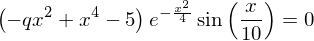

In [2]:
x = symbols('x')
q = symbols('q')
f = exp(-x**2/4)*sin(x/10)*(x**4 -q*x**2 - 5)
Gl_Nullstelle = Eq(f, 0)
Gl_Nullstelle

Durch die Multiplikation mit dem Sinus entstehen ja im Prinzip unendlich viele Nullstellen bei den Werten $x_i= +/- \, i \cdot 10 \,\pi \, , \,\, i \in$ &#8484; . Die ersten beiden positive Nullstellen des Beitrages vom Sinus lauten z.B $x_0=0$ und $x_1= 10 \,\pi \approx 31.4159$. Die weiteren Nullstellen ergeben sich durch die Nullstellen des Termes $\left( x^4 -q\,x^2 - 5 \right)$, den man einfach mittels einer Variablensubstitution bestimmen kann. In Abhängigkeit vom Parameter $q$ erhält man mittels des Befehles 'solve(...)' die folgenden  Lösungen:

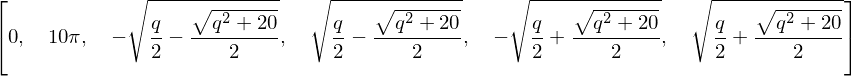

In [3]:
Loes_Gl_Nullstelle=solve(Gl_Nullstelle,x)
Loes_Gl_Nullstelle

Für $q=9$ erhalten wir vier reellwertige Lösungen $x_0=0$, $x_1=31.4159265358979$ $x_2=-3.08624979717463$  und $x_3=3.08624979717463$

In [4]:
set_q = 9
for L in Loes_Gl_Nullstelle:
    print(L.subs(q,set_q).evalf())

0
31.4159265358979
-0.724525921248126*I
0.724525921248126*I
-3.08624979717463
3.08624979717463


Drei dieser Nullstellen erkennt man auch in der folgenden Grafik:

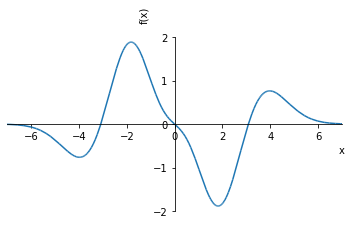

In [13]:
plot(f.subs(q,set_q),xlim=(-7,7),ylim=(-2.5,2.5));

<b>Darstellung von $f(x)$, $f^\prime(x)$ und $f^{\prime\prime}(x)$ mittels Jupyter</b>
<p>
Stellen Sie nun die Funktion $f(x)$ und die erste und zweite Ableitung der Funktion im Teilintervall $x \in [-7,7]$ grafisch in drei x-y-Diagrammen dar (benutzen Sie dafür wieder den festen Parameterwert $q=9$). Versuchen Sie die Maxima der Funktion (mit $q=9$) mittels Sympy zu bestimmen. 
</p>

Die erste Ableitung lautet:

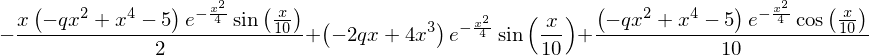

In [6]:
diff(f,x)

bzw. mittels 'simplify()'

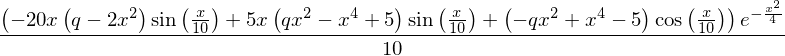

In [7]:
diff(f,x).simplify()

Wir stellen uns die Ableitung $f^\prime (x)$ für $q=9$ im Teilintervall $x \in [-7,7]$ grafisch dar.

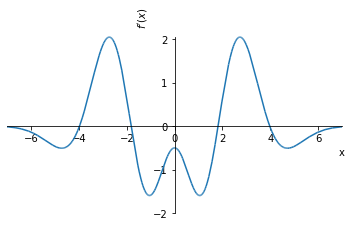

In [8]:
plot(diff(f,x).subs(q,set_q),xlim=(-7,7),ylim=(-2.5,2.5),ylabel=r"$f^\prime (x)$");

Die zweite Ableitung $f^{\prime \prime} (x)$ lautet:

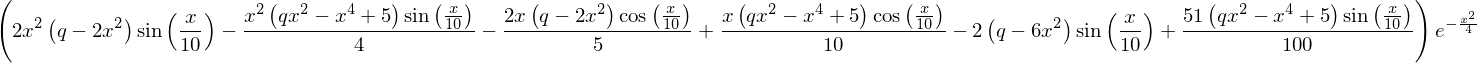

In [9]:
diff(f,x,x)

Wir stellen uns die zweite Ableitung $f^{\prime \prime} (x)$ für $q=9$ im Teilintervall $x \in [-7,7]$ grafisch dar.

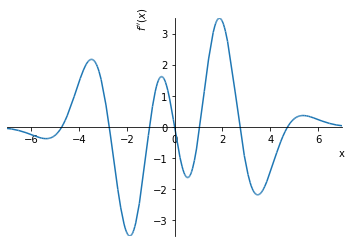

In [10]:
plot(diff(f,x,x).subs(q,set_q),xlim=(-7,7),ylim=(-3.5,3.5),ylabel=r"$f^{\prime \prime} (x)$");

Wir versuchen nun die Maxima der Funktion (mit $q=9$) mittels Sympy zu bestimmen. Dazu definieren wir zunächst die Gleichung $f^{\prime \prime} (x) = 0$ und benutzen dann, wie sonst auch, den Befehl 'solve(...)':

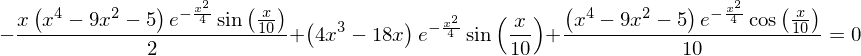

In [11]:
Gl_Extrema = Eq(diff(f,x).subs(q,set_q),0)
Gl_Extrema

In [12]:
solve(Gl_Extrema,x)

NotImplementedError: multiple generators [x, tan(x/20)]
No algorithms are implemented to solve equation -10*x*(x**4 - 9*x**2 - 5)*tan(x/20)/(tan(x/20)**2 + 1) + 20*(4*x**3 - 18*x)*tan(x/20)/(tan(x/20)**2 + 1) + (-tan(x/20)**2 + 1)*(x**4 - 9*x**2 - 5)/(tan(x/20)**2 + 1)

... leider ist die Gleichung zu kompliziert um sie auf symbolischem, analytischem Weg zu lösen ... 

<b>C++ Programm zur Bestimmung der Hochpunkte der Funktion</b>
<p>
Die Berechnung der x-Werte der Hochpunkte der Funktion $f(x)$ wird unter folgendem Link mittels der Methode der Bisektion (Intervallhalbierungsverfahren) in einem C++ Programm berechnet (siehe <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/Uebung/Uebungsblatt_7L.html" target="_blank">Musterlösung zum Übungsblatt 7</A> und das C++ Programm <A href="https://itp.uni-frankfurt.de/~hanauske/VPROG/C++/A7_1_Bisektion.cpp" target="_blank">A7_1_Bisektion.cpp</A>). 
    
    
    
</p>

Es berechneten sich die folgenden beiden x-Werte für die Hochpunkte: $x_{H_1} = -1.8178520203$ und $x_{H_2} = 3.9772608131$. Die berechneten Werte stimmen gut mit den Hochpunkten der Funktion überein, wie man in der folgenden Abbildung sieht.

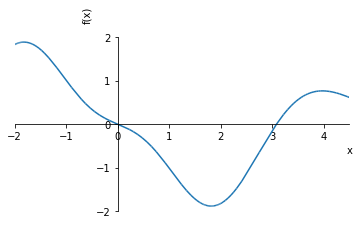

In [14]:
plot(f.subs(q,set_q),xlim=(-2,4.5),ylim=(-2.5,2.5));